In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
prompt_dirs = [
    "spatial-physical",
    "physical-temporal",
    "spatial-temporal",
    "spatial-temporal-physical",
]

In [42]:
llms = ['llama3:8b', 'ChatGPT3.5', 'ChatGPT4o', 'gemini-1.5-flash', 'gemini-1.5-pro']

In [44]:
results_per_commonsense = {prompt: {llm: [] for llm in llms}
                   for prompt in prompt_dirs}
for dir in prompt_dirs:
    prompts_json_filename = f"../{dir}/{dir}.json"
    with open(prompts_json_filename, "r") as prompts_file:
        prompts = json.load(prompts_file)
        for prompt in prompts:
            human = prompt["human_annotation"]
            for key in prompt["responses"].keys():
                correct = False
                try:
                    response = prompt["responses"][key]
                    if int(response) == human:
                        correct = True
                except ValueError as e:
                    pass
                results_per_commonsense[f"{dir}"][key].append(correct)

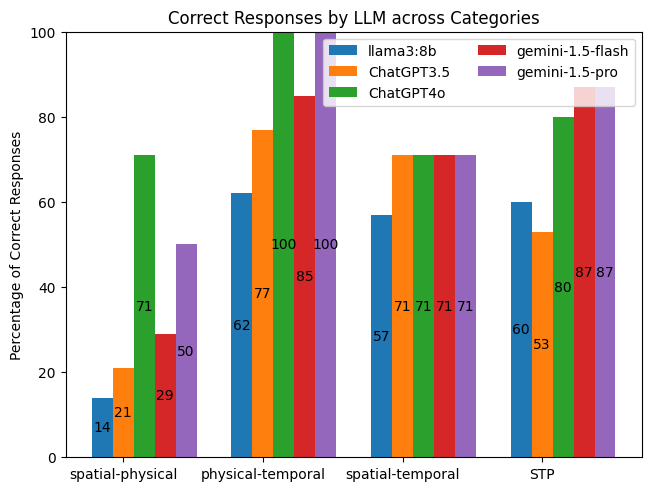

In [45]:
categories = list(results_per_commonsense.keys())
percentage_correct = {llm: [] for llm in llms}

for category in categories:
    for llm in llms:
        correct_responses = results_per_commonsense[category][llm]
        percentage = round(sum(correct_responses) / len(correct_responses), 2) * 100
        percentage_correct[llm].append(percentage)

# Plotting
x = np.arange(len(categories))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for llm, measurements in percentage_correct.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurements, width, label=llm)
    ax.bar_label(rects, label_type='center')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Correct Responses')
ax.set_title('Correct Responses by LLM across Categories')
categories[3] = 'STP'
ax.set_xticks(x + width, categories)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 100)

plt.show()

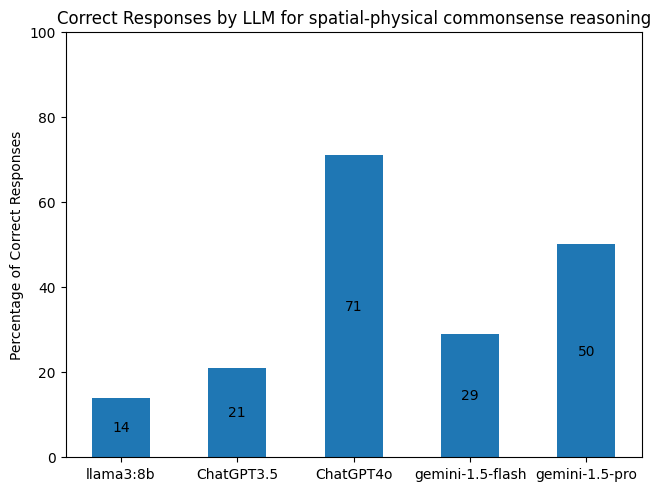

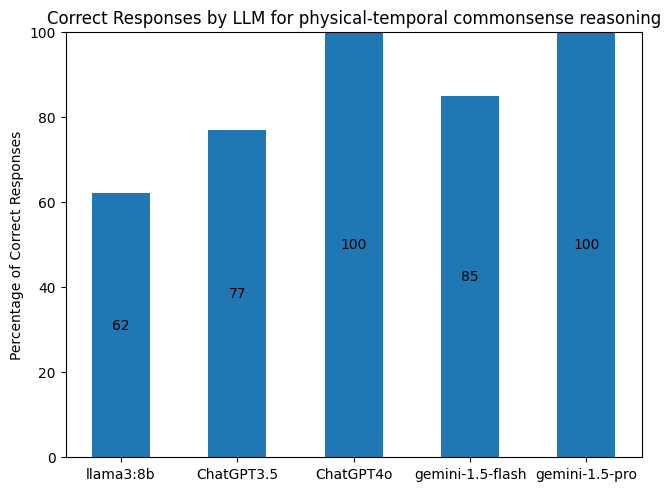

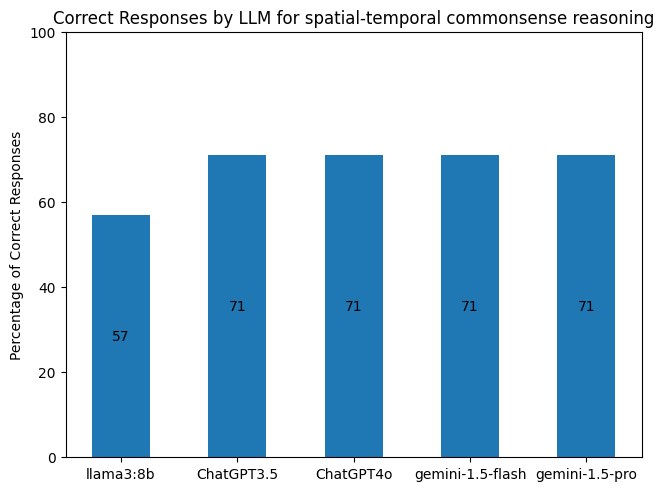

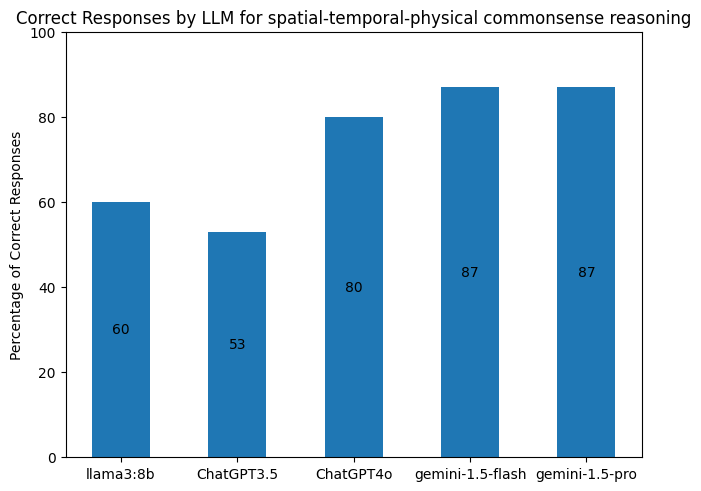

In [46]:
import numpy as np
categories = list(results_per_commonsense.keys())
percentage_correct = {category: [] for category in categories}

for category in categories:
    for llm in llms:
        correct_responses = results_per_commonsense[category][llm]
        percentage = round(sum(correct_responses) / len(correct_responses), 2) * 100
        percentage_correct[category].append(percentage)

width = 0.5  # the width of the bars

for category in categories:
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(llms))  # the label locations
    
    rects = ax.bar(x, percentage_correct[category], width)
    ax.bar_label(rects, label_type='center')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage of Correct Responses')
    ax.set_title(f'Correct Responses by LLM for {category} commonsense reasoning')
    ax.set_xticks(x, llms)
    ax.set_ylim(0, 100)

    plt.show()

In [11]:
def plot_llm(llm_name: str):
    percentages = {key: (round(sum(values) / len(values), 2) * 100)
                             for key, values in results_per_llm[llm_name].items()}
    keys = list(percentages.keys())
    values = list(percentages.values())

    bars = plt.bar(keys, values)
    plt.ylabel('Percentage Correct (%)')
    plt.title(f'{llm_name} accuracy for each commonsense category')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height- 10,
                 f'{height:.0f}', ha='center', va='center')
    plt.savefig(f"{llm_name}_results.png", dpi=400)
    plt.show()

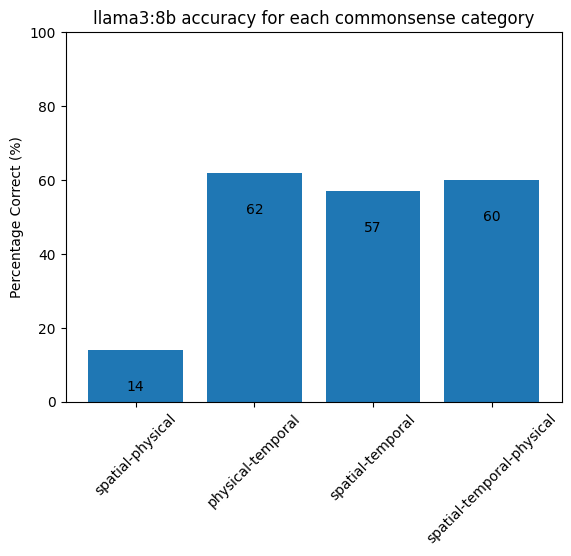

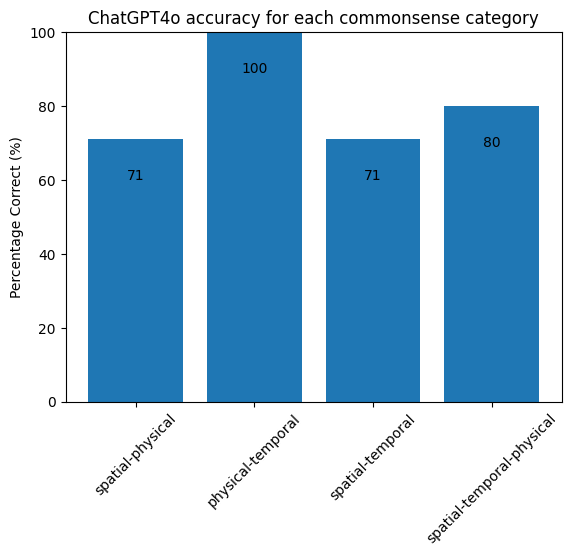

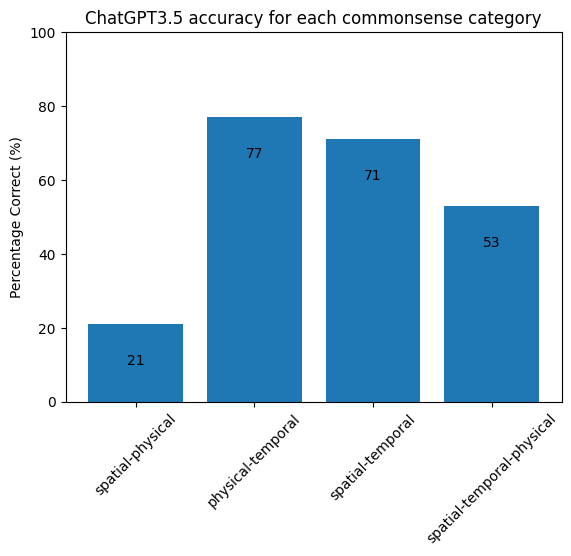

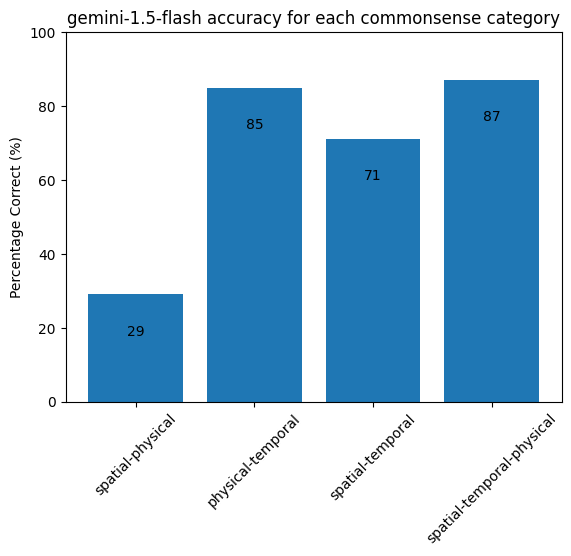

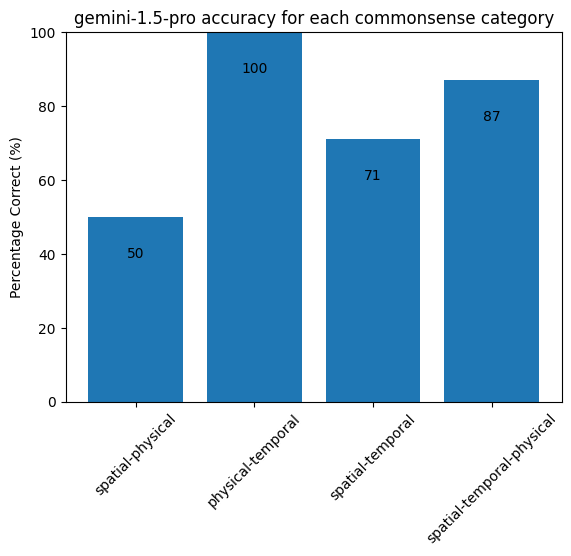

In [12]:
for llm in llms:
    plot_llm(llm)